In [1]:
from gurobipy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Nodes 
n=11
clients= [i for i in range(n) if i!=0]
nodes = [0]+clients
arcs = [(i,j) for i in nodes for j in nodes if i!=j]

# Demand
np.random.seed(0)
q= {n:np.random.randint(10,15) for n in clients}
q[0] = 0

# Time windows
e= {0:0,1:10,2:10,3:10,4:20,5:20,6:20,7:40,8:40,9:40,10:40} # Minimum arrival time
l= {0:200,1:100,2:100,3:100,4:150,5:150,6:150,7:180,8:180,9:180,10:180} # Maximum arrival time

s= {n:np.random.randint(3,5) for n in clients} # Service time in node i
s[0]=0

#Vehicles
vehicles = [1,2,3,4]

#Q=50
Q= {1:50, 2:50, 3:25, 4:25}

# Coordinates
X = np.random.rand(len(nodes))*100
Y = np.random.rand(len(nodes))*100

In [3]:
# distances and time
distances = {(i,j): np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in nodes for j in nodes if i!=j}
time = {(i,j): np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in nodes for j in nodes if i!=j}

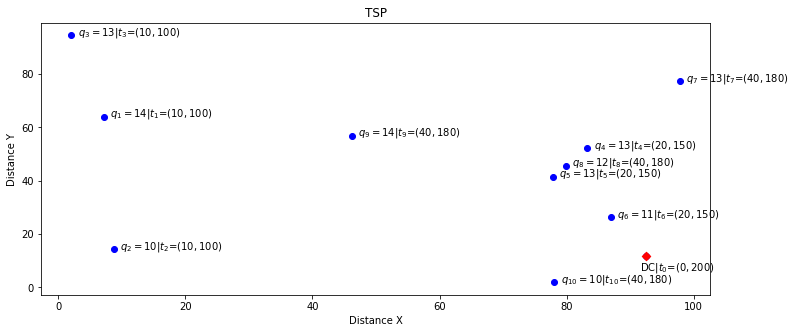

In [4]:
plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

plt.scatter(X[0],Y[0],color='red',marker='D')
plt.annotate("DC|$t_{%d}$=(%d$,%d$)"%(0,e[0],l[0]),(X[0]-1,Y[0]-5.5))

for i in clients:
    plt.annotate('$q_{%d}=%d$|$t_{%d}$=(%d$,%d$)'%(i,q[i],i,e[i],l[i]),(X[i]+1,Y[i]))
                 
plt.xlabel("Distance X")
plt.ylabel("Distance Y")
plt.title("TSP")
                 
plt.show()

In [5]:
arc_var = [(i,j,k) for i in nodes for j in nodes for k in vehicles if i!=j]
arc_time = [(i,k) for i in nodes for k in vehicles]

In [6]:
model = Model('VRPTW')

x = model.addVars(arc_var, vtype=GRB.BINARY, name='x')
t = model.addVars(arc_time, vtype=GRB.CONTINUOUS, name='t')

model.setObjective(quicksum(distances[i,j]*x[i,j,k] for i,j,k in arc_var), GRB.MINIMIZE)

model.addConstrs(quicksum(x[0,j,k] for j in clients)<=1 for k in vehicles)
model.addConstrs(quicksum(x[i,0,k] for i in clients)<=1 for k in vehicles)

model.addConstrs(quicksum(x[i,j,k] for j in nodes for k in vehicles if i!=j)==1 for i in clients)

model.addConstrs(quicksum(x[i,j,k] for j in nodes if i!=j)-quicksum(x[j,i,k] for j in nodes if i!=j)==0
                for i in nodes for k in vehicles)

model.addConstrs(quicksum(q[i]*quicksum(x[i,j,k] for j in nodes if i!=j) for i in clients) <=Q[k] for k in vehicles)

model.addConstrs((x[i,j,k]==1)>> (t[i,k]+s[i]+time[i,j]==t[j,k]) for i in clients for j in clients for k in vehicles if i!=j)

model.addConstrs(t[i,k] >= e[i] for i,k in arc_time)
model.addConstrs(t[i,k] <= l[i] for i,k in arc_time)

# model.Params.timelimit = 60
# model.Params.MIPGap = 0.1

model.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-18
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 154 rows, 484 columns and 1848 nonzeros
Model fingerprint: 0xf4309238
Model has 360 general constraints
Variable types: 44 continuous, 440 integer (440 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [5e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
  GenCon rhs range [8e+00, 1e+02]
  GenCon coe range [1e+00, 1e+00]
Presolve added 414 rows and 0 columns
Presolve removed 0 rows and 64 columns
Presolve time: 0.10s
Presolved: 568 rows, 420 columns, 4042 nonzeros
Variable types: 102 continuous, 318 integer (318 binary)
Found heuristic solution: objective 851.1598825

Root relaxation: objective 

In [7]:
print("Function Objective: ", str(round(model.ObjVal,2)))

for v in model.getVars():
    if v.x > 0.9:
        print(str(v.VarName)+"="+str(v.x))

Function Objective:  587.21
x[0,3,1]=1.0
x[0,6,4]=1.0
x[0,8,3]=1.0
x[0,9,2]=1.0
x[1,2,1]=1.0
x[2,10,1]=1.0
x[3,1,1]=1.0
x[4,0,2]=1.0
x[5,0,3]=1.0
x[6,0,4]=1.0
x[7,4,2]=1.0
x[8,5,3]=1.0
x[9,7,2]=1.0
x[10,0,1]=1.0
t[1,1]=43.89558456994985
t[1,2]=10.0
t[1,3]=10.0
t[1,4]=10.0
t[2,1]=96.57842937487484
t[2,2]=10.0
t[2,3]=10.0
t[2,4]=10.0
t[3,1]=10.0
t[3,2]=10.0
t[3,3]=10.0
t[3,4]=10.0
t[4,1]=20.0
t[4,2]=131.81559488941522
t[4,3]=20.0
t[4,4]=20.0
t[5,1]=20.0
t[5,2]=20.0
t[5,3]=47.65012134249942
t[5,4]=20.0
t[6,1]=20.0
t[6,2]=20.0
t[6,3]=20.0
t[6,4]=20.0
t[7,1]=40.0
t[7,2]=98.65844570516039
t[7,3]=40.0
t[7,4]=40.0
t[8,1]=40.0
t[8,2]=40.0
t[8,3]=40.0
t[8,4]=40.0
t[9,1]=40.0
t[9,2]=40.0
t[9,3]=40.0
t[9,4]=40.0
t[10,1]=170.02837267753264
t[10,2]=40.0
t[10,3]=40.0
t[10,4]=40.0


In [8]:
# Graphing the solution 

routes=[]
truck=[]
K = vehicles
N = nodes
for k in vehicles:
    for i in nodes:
        if i!=0 and x[0,i,k].x >0.9:
            aux=[0,i]
            while i!=0:
                j=i
                for h in nodes:
                    if j!=h and x[j,h,k].x>0.9:
                        aux.append(h)
                        i=h
            routes.append(aux)
            truck.append(k)

print(routes)
print(truck)

[[0, 3, 1, 2, 10, 0], [0, 9, 7, 4, 0], [0, 8, 5, 0], [0, 6, 0]]
[1, 2, 3, 4]


In [9]:
# Time calculation

time_acum= list()
for n in range(len(routes)):
    
    for k in range(len(routes[n])-1):
        if k==0:
            aux=[0]
        else:
            i=routes[n][k]
            j=routes[n][k+1]
            t=time[i,j]+s[i]+aux[-1]
            aux.append(t)
    time_acum.append(aux)

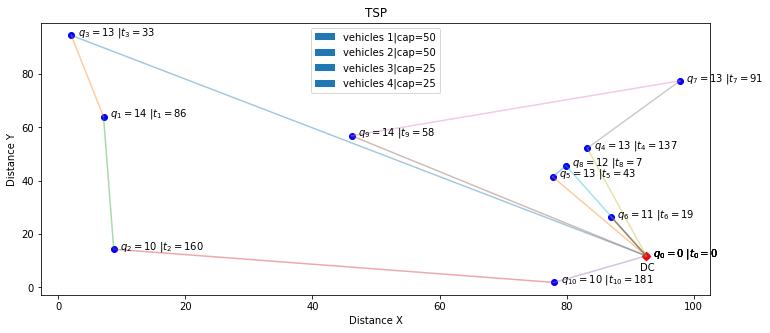

In [10]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

plt.scatter(X[0],Y[0],color='red',marker='D')
plt.annotate("DC", (X[0]-1,Y[0]-5.5))

for r in range(len(routes)):
    for n in range(len(routes[r])-1):
        i=routes[r][n]
        j=routes[r][n+1]
        plt.plot([X[i],X[j]],[Y[i],Y[j]], alpha=0.4)
        
for r in range(len(time_acum)):
    for n in range(len(time_acum[r])):
        i=routes[r][n]
        plt.annotate('$q_{%d}=%d$ |$t_{%d}=%d$'%(i,q[i],i,time_acum[r][n]),(X[i]+1,Y[i]))

patch = [mpatches.Patch( 
    label="vehicles "+str(truck[n])+ "|cap="+str(Q[truck[n]])) for n in range(len(truck))]
plt.legend(handles=patch,loc='best')
                 
plt.xlabel("Distance X")
plt.ylabel("Distance Y")
plt.title("TSP")
                 
plt.show()